In [8]:
# Import needed modules
import pandas as pd
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt

## Data cleaning

In [ ]:
# Open the data set
df = pd.read_csv("rus_t.csv")
df.dropna(inplace=True)
df

In [5]:
# Translate to English
translator = GoogleTranslator(source='ru', target='en')
df["country"] = df["country"].apply(translator.translate)
df

,country,n_inbound,year
0,Ukraine,8436,2014
1,Kazakhstan,3733,2014
2,Poland,1772,2014
3,Finland,1380,2014
4,Uzbekistan,874,2014
...,...,...,...
503,Estonia,54,2022
504,South Ossetia,146,2022
505,South Africa,1,2022
506,Japan,2,2022


In [6]:
# Save the fixed dataset
# df.to_csv("rus_t.csv")

## Data exploration

In [32]:
df.groupby("year").sum()

,n_inbound
year,
2014,25437
2015,26850
2016,24571
2017,24391
2018,24551
2019,24419
2020,6363
2021,7082
2022,8242


Text(0, 0.5, 'Number of inbound tourists')

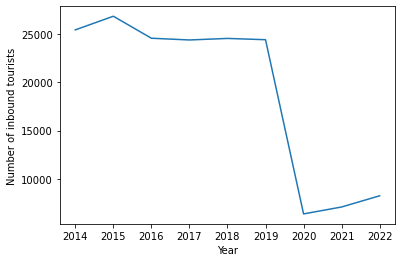

In [18]:
# Line chart - general dynamics
fig  = plt.figure()
ax   = plt.axes()
ax.plot(df.groupby("year").sum().index, df.groupby("year").sum()["n_inbound"])
ax.set_xlabel('Year')
ax.set_ylabel('Number of inbound tourists')
#ax.set_title('Number of inbound tourists in Russia')

In [54]:
# Unique countries every year
d = {"year" : [year for year in range(2014, 2023)],
    "unique_cnt" : [df[df["year"] == year].shape[0] for year in range(2014, 2023)],
    "others_shr" : [round(df[df["year"] == year][df["country"] == "Other countries"].loc[:,"n_inbound"].item() / df.groupby("year").sum().loc[year].item() * 100, 1) for year in range(2014, 2023)]}

app4 = pd.DataFrame.from_dict(d)
print(app4.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  year &  unique\_cnt &  others\_shr \\
\midrule
0 &  2014 &          26 &         6.5 \\
1 &  2015 &          26 &         6.2 \\
2 &  2016 &          61 &         1.8 \\
3 &  2017 &          61 &         2.1 \\
4 &  2018 &          66 &         2.3 \\
5 &  2019 &          67 &         2.0 \\
6 &  2020 &          67 &         1.5 \\
7 &  2021 &          67 &         1.0 \\
8 &  2022 &          67 &        13.8 \\
\bottomrule
\end{tabular}



<ipython-input-54-0eef64c0e6cd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "others_shr" : [round(df[df["year"] == year][df["country"] == "Other countries"].loc[:,"n_inbound"].item() / df.groupby("year").sum().loc[year].item() * 100, 1) for year in range(2014, 2023)]}


In [89]:
cont = set(df[df["year"] == 2014]["country"].unique())
for year in range(2015, 2023):
    cont.intersection(set(df[df["year"] == year]["country"].unique()))
cont - {'Other countries'}
[print(country, end=", ") for country in cont - {'Other countries'}]

Italy, Kazakhstan, Belarus, Germany, Armenia, Kyrgyzstan, Poland, USA, Latvia, Estonia, Finland, China, Great Britain, Korea, Lithuania, Israel, Tajikistan, The Republic of Moldova, Abkhazia, Uzbekistan, Ukraine, Türkiye, Azerbaijan, France, Mongolia, 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [62]:
set(df[df["year"] == 2014]["country"].unique())

{'Abkhazia',
 'Armenia',
 'Azerbaijan',
 'Belarus',
 'China',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Great Britain',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Korea',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Mongolia',
 'Other countries',
 'Poland',
 'Tajikistan',
 'The Republic of Moldova',
 'Türkiye',
 'USA',
 'Ukraine',
 'Uzbekistan'}

In [101]:
final_lst = []
for country in cont - {'Other countries'}:
    try:
        for year in range(2014, 2022):
            cnty_lst = []
            cnty_lst.append(country)
            cnty_lst.append(year + 1)
            cnty_lst.append(df[df["country"] == country][df["year"] == year + 1]["n_inbound"].item())
            cnty_lst.append(round(df[df["country"] == country][df["year"] == year + 1]["n_inbound"].item() / df[df["country"] == country][df["year"] == year]["n_inbound"].item() * 100 - 100, 2))
            final_lst.append(cnty_lst)
    except:
        cnty_lst.append(None)
        final_lst.append(cnty_lst)
    
change_df = pd.DataFrame(final_lst, columns=["country", "year", "n_inbound", "growth"])
change_df

<ipython-input-101-df10e8476d57>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnty_lst.append(df[df["country"] == country][df["year"] == year + 1]["n_inbound"].item())
<ipython-input-101-df10e8476d57>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnty_lst.append(round(df[df["country"] == country][df["year"] == year + 1]["n_inbound"].item() / df[df["country"] == country][df["year"] == year]["n_inbound"].item() * 100 - 100, 2))


,country,year,n_inbound,growth
0,Italy,2015,191.0,-7.73
1,Italy,2016,192.0,0.52
2,Italy,2017,189.0,-1.56
3,Italy,2018,205.0,8.47
4,Italy,2019,232.0,13.17
...,...,...,...,...
183,Mongolia,2018,387.0,-2.27
184,Mongolia,2019,376.0,-2.84
185,Mongolia,2020,45.0,-88.03
186,Mongolia,2021,3.0,-93.33


Text(0, 0.5, 'Number of inbound tourists')

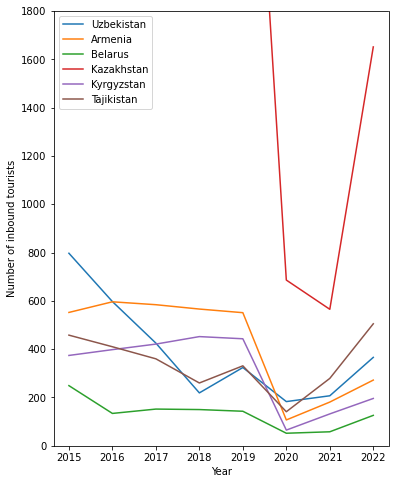

In [135]:
fig  = plt.figure(figsize=(6, 8))
ax   = plt.axes()
ax.set_ylim([0, 1800])
ax.plot(change_df[change_df["country"] == "Uzbekistan"]["year"], change_df[change_df["country"] == "Uzbekistan"]["n_inbound"], label="Uzbekistan")
ax.plot(change_df[change_df["country"] == "Armenia"]["year"], change_df[change_df["country"] == "Armenia"]["n_inbound"], label="Armenia")
ax.plot(change_df[change_df["country"] == "Belarus"]["year"], change_df[change_df["country"] == "Belarus"]["n_inbound"], label="Belarus")
ax.plot(change_df[change_df["country"] == "Kazakhstan"]["year"], change_df[change_df["country"] == "Kazakhstan"]["n_inbound"], label="Kazakhstan")
ax.plot(change_df[change_df["country"] == "Kyrgyzstan"]["year"], change_df[change_df["country"] == "Kyrgyzstan"]["n_inbound"], label="Kyrgyzstan")
ax.plot(change_df[change_df["country"] == "Tajikistan"]["year"], change_df[change_df["country"] == "Tajikistan"]["n_inbound"], label="Tajikistan")
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of inbound tourists')

Text(0, 0.5, 'Number of inbound tourists')

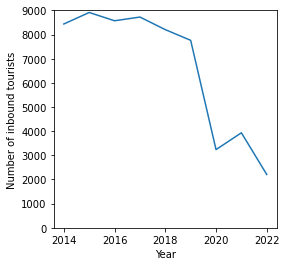

In [148]:
fig  = plt.figure(figsize=(4, 4))
ax   = plt.axes()
ax.set_ylim([0, 9000])
ax.plot(df[df["country"] == "Ukraine"]["year"], df[df["country"] == "Ukraine"]["n_inbound"], label="Ukraine")
#ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of inbound tourists')